# Exploratory data analysis on Google Playstore Apps dataset

## Author - Keyuri Raodeo


# Dataset
The googleplaystore.csv file in the Google Play Store Apps dataset on Kaggle (https://www.kaggle.com/lava18/google-play-store-apps) contains information about apps from various genres, scraped from Google Play store. The information includes the app name, category, ratings, reviews, price, genre etc.

# Problem
The task of the project is to analyze the app ratings, reviews and installs, to find out what does it take for a genre of app to do well in the android market based on different variables. We will look at the correlations of various variables in the data set and find out how each of them affect the popularity of apps and their genres.

Specifically, we will answer the following questions:
1. Which genres, types of apps (free or paid), Content Rating are installed the most?
2. Which genres, types of apps (free or paid), Content Rating have the most reviews?
3. Which genres, types of apps (free or paid), Content Rating have the most ratings?
4. Is there a correlation between number of installs, number of reviews and ratings?

Python is used in the entire project and we use libraries like pandas and numpy to deal with the data, matplotlib and seaborn for data visualization and statistics.

In [1]:
# Import libraries
import os
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
current_dir = os.getcwd()
app_df = pd.read_csv(current_dir + "/googleplaystore.csv", sep=',', header=0)
app_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
app_df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

Looking at the type of columns, some columns like Price, Reviews and Installs contain strings and thus, need to be converted to numeric format after removing the nulls in order to do this analysis.

## Data Cleaning

In [4]:
# Step 1: Converting categorical variables into numeric variables/Dummy Variables - 'Price' & 'Reviews'
app_df['Price'] = [ re.sub("\$", "", x) if "$" in x else x for x in app_df['Price'] ] # Remove all strings from price
num_columns = ['Reviews', 'Price']
app_df[num_columns] = app_df[num_columns].apply(pd.to_numeric, errors='coerce') # Convert to numeric

In [5]:
# 'Size' variable
def scaling(size):
    if 'M' in size:
        x = float(size[:-1])*1000000
        return(x)
    elif 'k' in size:
        x = float(size[:-1])*1000
        return(x)

app_df["Size"] = app_df["Size"].map(scaling)

In [6]:
# 'Installs' variable

app_df['Installs'] = [ x.replace('Free','0') for x in app_df['Installs']]
app_df['Installs'] = [x[:-1].replace(',','') if x != '0' else x for x in app_df['Installs']]
app_df['Installs'] = pd.to_numeric(app_df['Installs'])

Now that we have taken a converted all the variables we need, to numeric in the dataset, we need to find any nulls in the dataset.

In [7]:
# Data Cleaning - Step 2: Finding nulls in the dataset
app_df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              1
Size              1696
Installs             0
Type                 1
Price                1
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

We will remove the rows containing null values in the dataset. However, since the number of nulls in the 'Rating' and 'Size' columns are far more, we will replace those with the 0, so that we know those data points when looking at the visualizations.

In [8]:
# Remove rows with null values, except "Rating" and "Size" column
null_columns = app_df.columns[app_df.isna().any()].tolist()

for column in null_columns:
    if column != 'Rating' and column != 'Size':
        app_df = app_df[pd.notnull(app_df[column])]

# Replace nulls with 0 in "Rating" and "Size" columns
app_df['Rating'].fillna(0, inplace=True)
app_df['Size'].fillna(0, inplace=True)

#Confirming if there are any missing values left in the dataframe
app_df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

Now that we have dealt with the null values, we will remove the redundant features in the dataset. The features 'Category' and 'Genres' are almost the same. Thus, we will drop the 'Category' feature. We will also drop the variables, 'Last Updated', 'Current Ver', 'Android Ver' since they aren't useful for this analysis.

In [9]:
# Data Cleaning - Step 3: Removing redundant features
app_df = app_df.drop(columns = ['Category', 'Last Updated', 'Current Ver', 'Android Ver'])

Now that all the data is cleaned and ready to be explored, we will confirm if all the variables are as we want them to be.

In [10]:
app_df.columns

Index(['App', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price',
       'Content Rating', 'Genres'],
      dtype='object')

In [11]:
app_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10829 entries, 0 to 10840
Data columns (total 9 columns):
App               10829 non-null object
Rating            10829 non-null float64
Reviews           10829 non-null float64
Size              10829 non-null float64
Installs          10829 non-null int64
Type              10829 non-null object
Price             10829 non-null float64
Content Rating    10829 non-null object
Genres            10829 non-null object
dtypes: float64(4), int64(1), object(4)
memory usage: 676.8+ KB


Once that is confirmed, we will explore the data using summary statistics.

In [12]:
# Summary Statistics
app_df.describe()

,Rating,Reviews,Size,Installs,Price
count,10829.000000,1.082900e+04,1.082900e+04,1.082900e+04,10829.000000
mean,3.623197,4.446018e+05,1.816621e+07,1.547990e+07,1.028091
std,1.513263,2.929213e+06,2.217690e+07,8.507114e+07,15.957778
min,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,3.700000,3.800000e+01,2.600000e+06,5.000000e+03,0.000000
50%,4.200000,2.100000e+03,9.200000e+06,1.000000e+05,0.000000
75%,4.500000,5.481500e+04,2.600000e+07,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+08,1.000000e+09,400.000000


Notice the summary statistics is also displayed for the columns we converted to numeric, which is very helpful. A few noticeable points in the summary statistics:
1. Mean Rating is 3.6 and the median is at 4.2, which is pretty high. It implies that many apps have a pretty high rating.
2. The median price of the apps is 0, which means that most apps in the data set are free, which is interesting considering the high median size of the apps at 9.2 MB.

## Data Visualization

### Individual Features

/home/keyuri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Text(0.5, 1.0, 'Bar Plot of Genres')

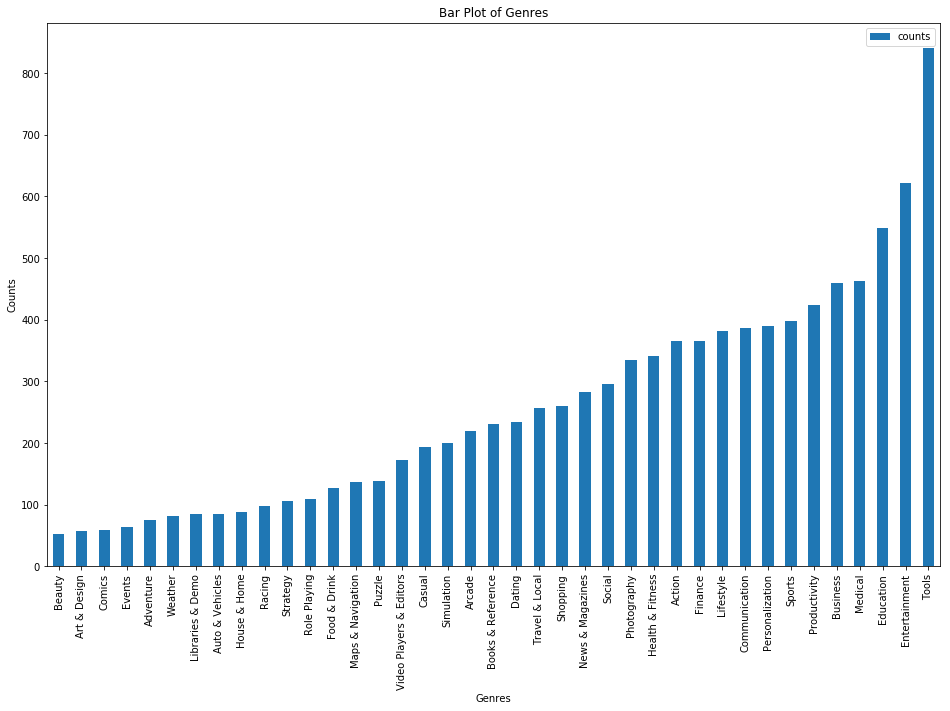

In [13]:
# Bar Plot of Genres
%matplotlib inline

app_df['counts'] = 1
high_count_genre = app_df[app_df.groupby('Genres')['Genres'].transform('size') > 50]
high_count_genre['counts'] = 1
ax = high_count_genre.loc[:, ['Genres', 'counts']].groupby(['Genres']).agg('count').sort_values('counts').plot.bar(
    figsize=(16,10))
ax.set_ylabel('Counts')
ax.set_title('Bar Plot of Genres')

Here, we analyze the app genres to find which genres have the highest number of apps. The five genres with the most apps in the android market are Tools, Entertainment, Education, Medical and Business. 

Before moving on to the correlations of different variables, let's explore which  of these genres have paid apps and which ones have free apps. It will be interesting to see an overlap between the most popular genres.

Text(0.5, 1.0, 'Bar Plot of Paid Genres')

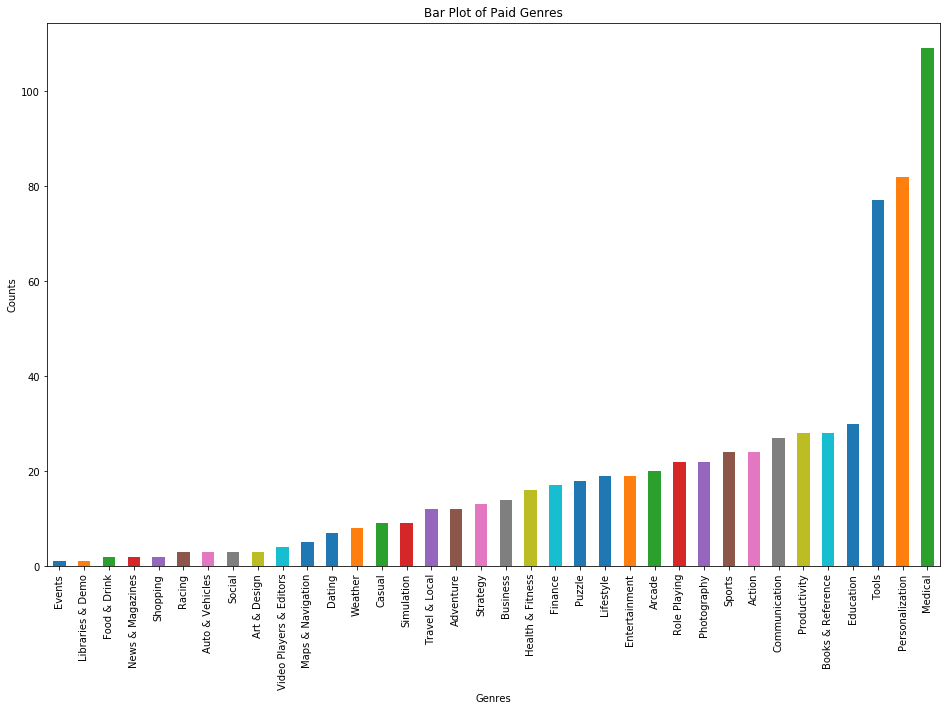

In [14]:
# Bar Plot of Paid Genres
paid_genre = high_count_genre.loc[high_count_genre.loc[:, 'Type']=='Paid', 'Genres']
ax = paid_genre.value_counts().sort_values().plot.bar(figsize=(16,10))
ax.set_ylabel('Counts')
ax.set_xlabel('Genres')
ax.set_title('Bar Plot of Paid Genres')

Not surprisingly, the 'Medical' genre has the most number of paid apps, followed by 'Personalization' and 'Tools'. All the other genres have much lesser number of paid apps. Moving on to the genres having free apps ...

Text(0.5, 1.0, 'Bar Plot of Free Genres')

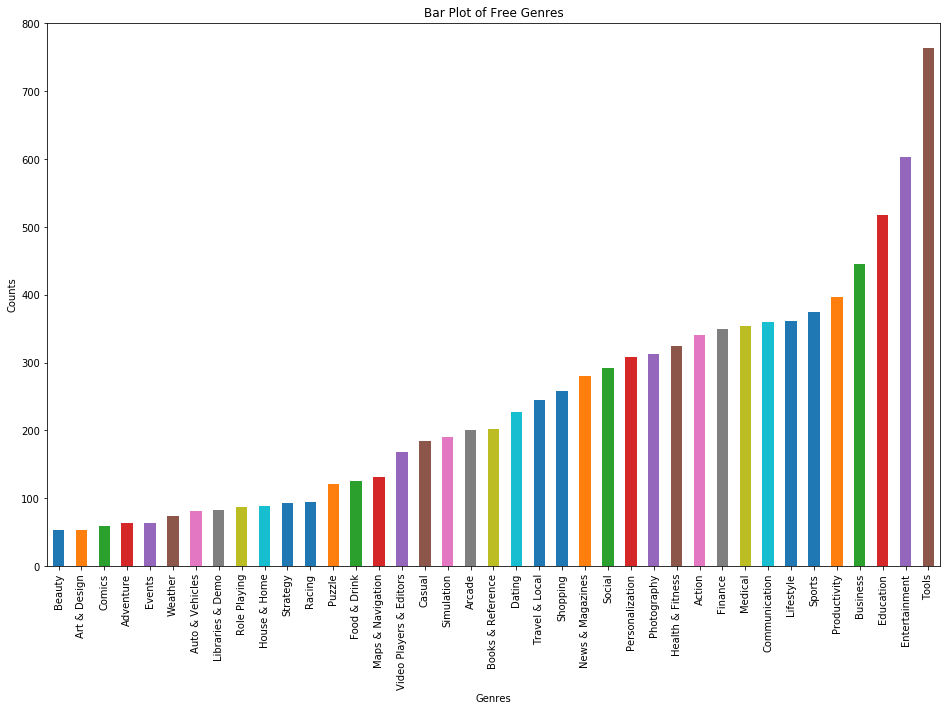

In [15]:
# Bar Plot of Free Genres
paid_genre = high_count_genre.loc[high_count_genre.loc[:, 'Type']=='Free', 'Genres']
ax = paid_genre.value_counts().sort_values().plot.bar(figsize=(16,10))
ax.set_ylabel('Counts')
ax.set_xlabel('Genres')
ax.set_title('Bar Plot of Free Genres')

The genre having most number of free apps is 'Tools'. Recall that, 'tools' also had the third largest number of paid apps. But, this is not surprising considering that, tools tops the list of the total number of apps. The other genres with most number of free apps are 'Entertainment' and 'Education'.

Now, let's check out how the apps perform in the market by looking at how many installs, reviews and ratings do they get.

### Correlations

**1. Let's see which factors influence the number of installs for the apps.**

Text(0.5, 1.0, 'Bar Plot of Genres color coded by number of installs')

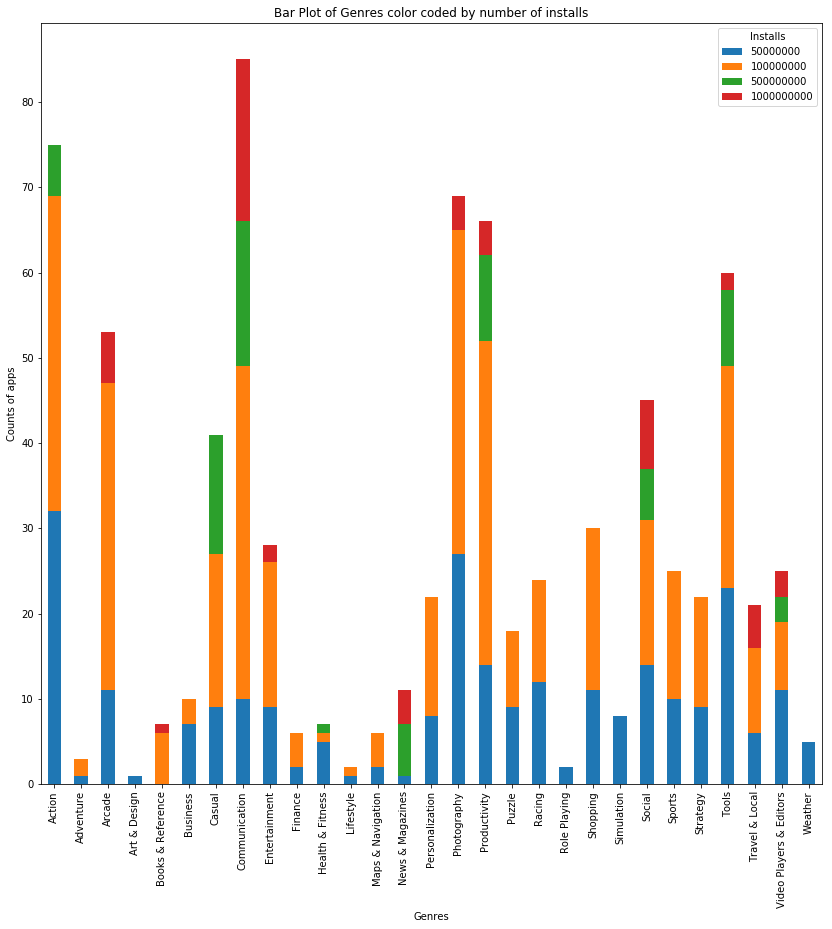

In [16]:
# Bar plot of Genres by installs

selective_installs = high_count_genre.loc[high_count_genre.loc[:,'Installs']>10000000]
ax = selective_installs.groupby(['Genres', 'Installs']).size().unstack().plot(kind='bar', stacked=True, figsize = (14,14))
ax.set_ylabel('Counts of apps')
ax.set_xlabel('Genres')
ax.set_title('Bar Plot of Genres color coded by number of installs')

The above bar plot shows the top genres having the most apps and the most installs in the data set. Given that, most of the userbase of apps constitutes the young crowd, it's not suprising that the genre "Communication" has the most apps with maximum number of installs.

Text(0.5, 1.0, 'Bar Plot of Installs color coded by the type')

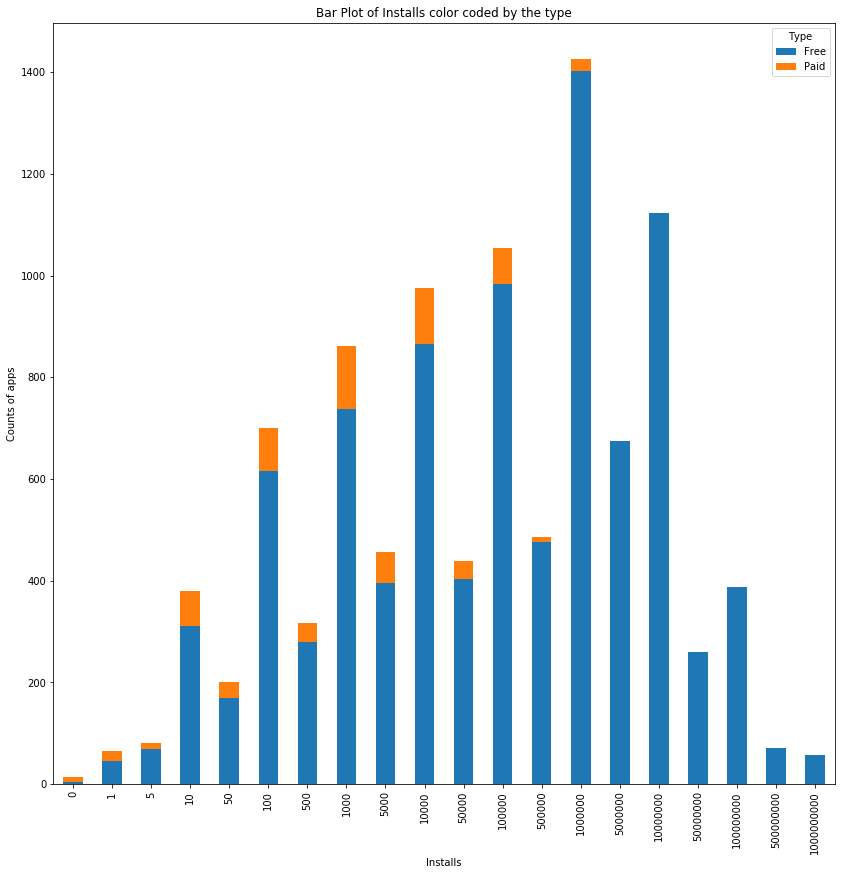

In [17]:
# Bar plot of Genres by installs

ax = high_count_genre.groupby(['Installs', 'Type']).size().unstack().plot(kind='bar', stacked=True, figsize = (14,14))
ax.set_ylabel('Counts of apps')
ax.set_xlabel('Installs')
ax.set_title('Bar Plot of Installs color coded by the type')

The above plot shows that, most apps are free and the apps which are paid have a low number of installs. It's obvious that, the installs do depend on whether the app is free or paid.

Text(0.5, 1.0, 'Bar Plot of Installs color coded by the Content Rating')

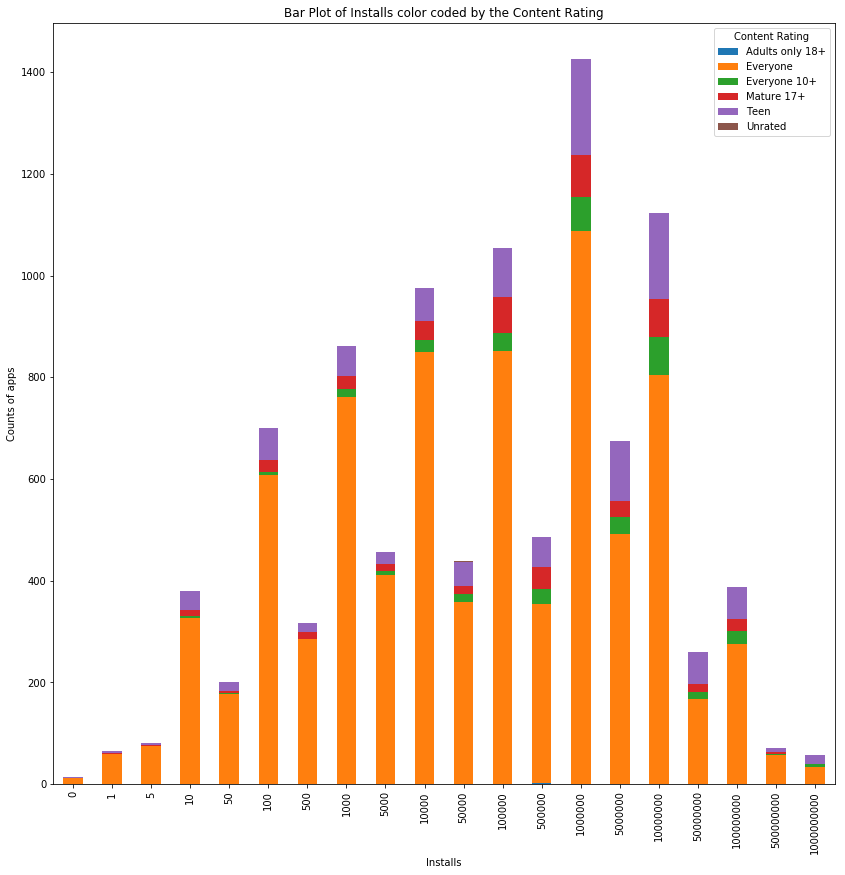

In [18]:
# Bar plot of Genres by Content Rating
ax = high_count_genre.groupby(['Installs', 'Content Rating']).size().unstack().plot(
    kind='bar', stacked=True, figsize=(14,14))
ax.set_ylabel('Counts of apps')
ax.set_xlabel('Installs')
ax.set_title('Bar Plot of Installs color coded by the Content Rating')

Apart from the apps that are for everyone (which are obviously, installed the most), there are a suprisingly high number of teen apps that are installed a lot. This simply proves that, teens consist of a significant proportion of app users in the world. Hence, the Content Rating does have an impact on the installs.

**2. Let's determine which features influence the number of reviews an app can get.**

/home/keyuri/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/keyuri/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Text(0.5, 1.0, 'Bar plot of Genres by Reviews')

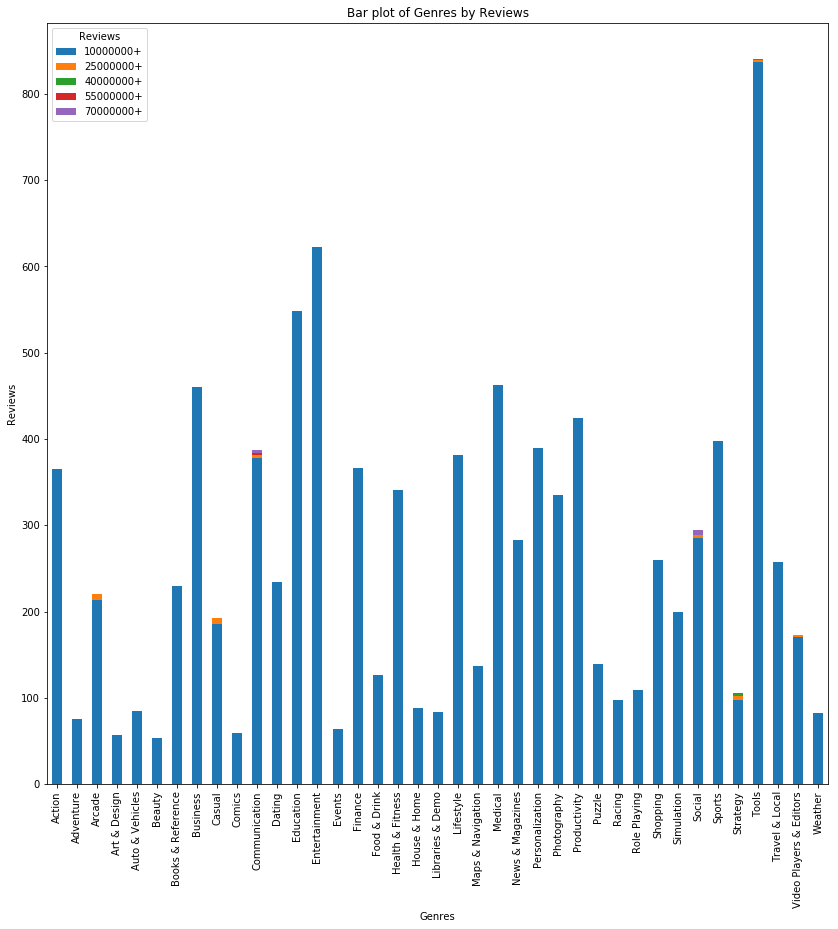

In [19]:
# Bar plot of genre by reviews
high_count_genre.loc[:, 'Reviews_bin'] = pd.cut(high_count_genre.loc[:, 'Reviews'], bins = 5, labels = range(5))
ax = high_count_genre.groupby(['Genres', 'Reviews_bin']).size().unstack().plot(
    kind='bar', legend = False, stacked=True, figsize = (14,14))
plt.legend(title='Reviews', labels=['10000000+', '25000000+', '40000000+', '55000000+', '70000000+'])
ax.set_xlabel("Genres")
ax.set_ylabel("Reviews")
ax.set_title("Bar plot of Genres by Reviews")

Among the top genres with the most apps, it's interesting to note that most genres have apps with 1e7+ reviews. Only a couple of genres (Communication and Social) have a very tiny percentage of apps with 7e7+ reviews. Thus, number of reviews don't seem to directly depend on the genre of apps.

Text(0.5, 1.0, 'Bar plot of Reviews by Type')

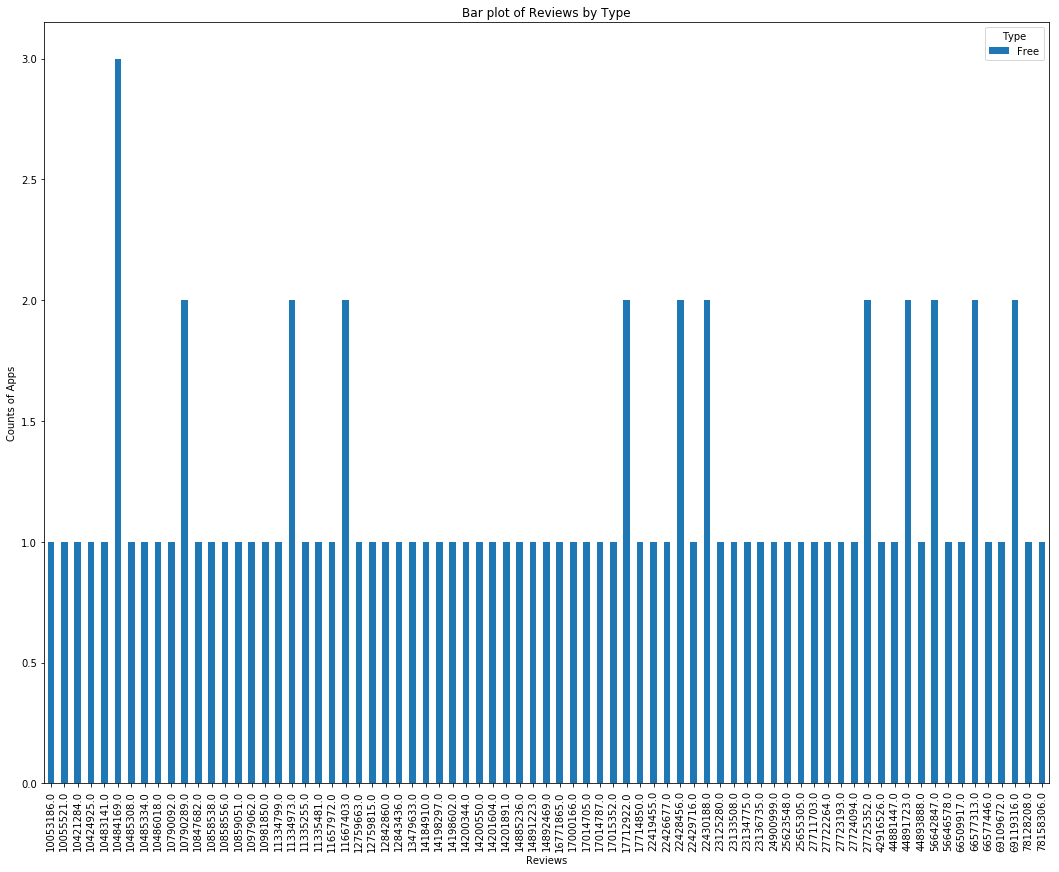

In [20]:
# Bar plot of reviews by Type

selective_reviews = high_count_genre.loc[high_count_genre.loc[:,'Reviews']>10000000]
ax = selective_reviews.groupby(['Reviews', 'Type']).size().unstack().plot(kind='bar', stacked=True, figsize = (18,14))
ax.set_xlabel("Reviews")
ax.set_ylabel("Counts of Apps")
ax.set_title("Bar plot of Reviews by Type")

The above plot displays a couple of interesting observations. 
1. There are only 1-3 apps in each of the values for number of reviews above 10000000. 
2. All the apps that have such high reviews are free. There are absolutely no paid apps with such high number of reviews.

Text(0.5, 1.0, 'Bar plot of Genres by Content Rating')

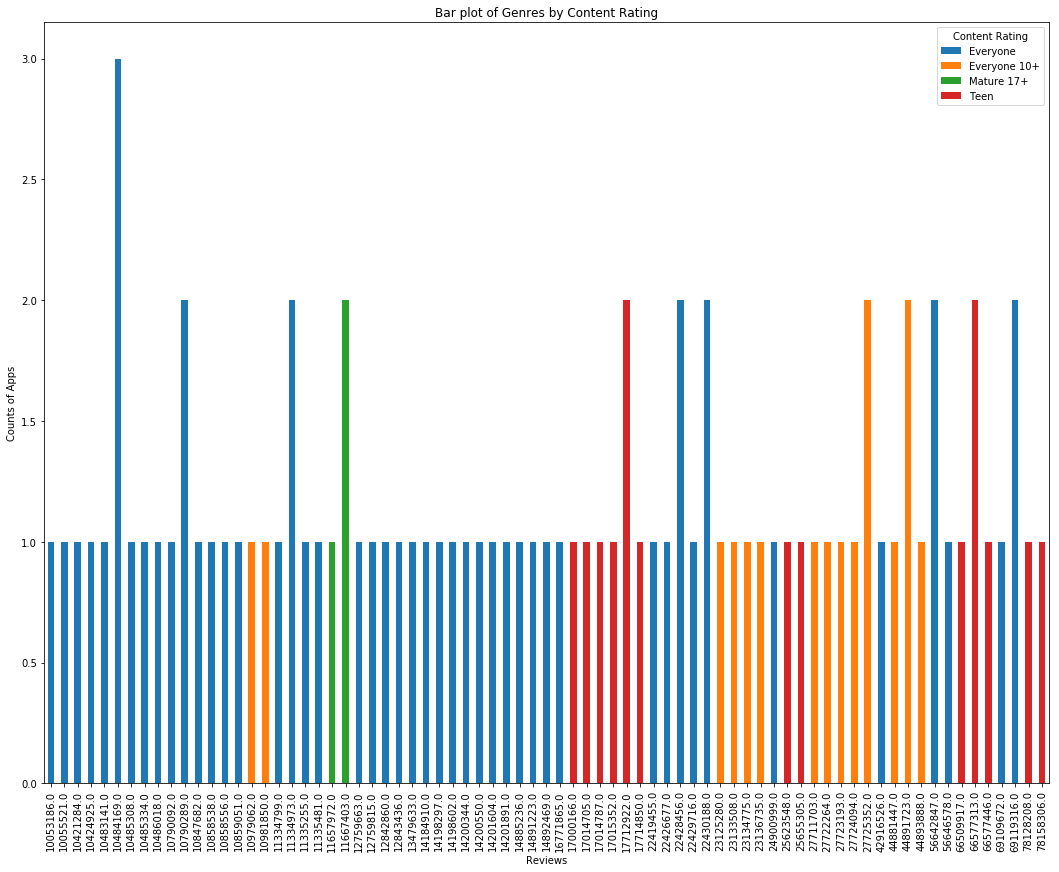

In [21]:
# Bar plot of reviews by Content Rating
ax = selective_reviews.groupby(['Reviews', 'Content Rating']).size().unstack().plot(
    kind='bar', stacked=True, figsize = (18,14))
ax.set_xlabel("Reviews")
ax.set_ylabel("Counts of Apps")
ax.set_title("Bar plot of Genres by Content Rating")

As noticed before with installs, many of the apps with high reviews are teen apps. Interestly, there is also a large proportion of 10+ ages apps with high reviews.
Overall, I think it's safe to say that 'Type' and 'Content Rating' affect the number of reviews.

**3. Let's see which features affect the app ratings.**

/home/keyuri/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/keyuri/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Text(0.5, 1.0, 'Bar plot of Genres by Ratings')

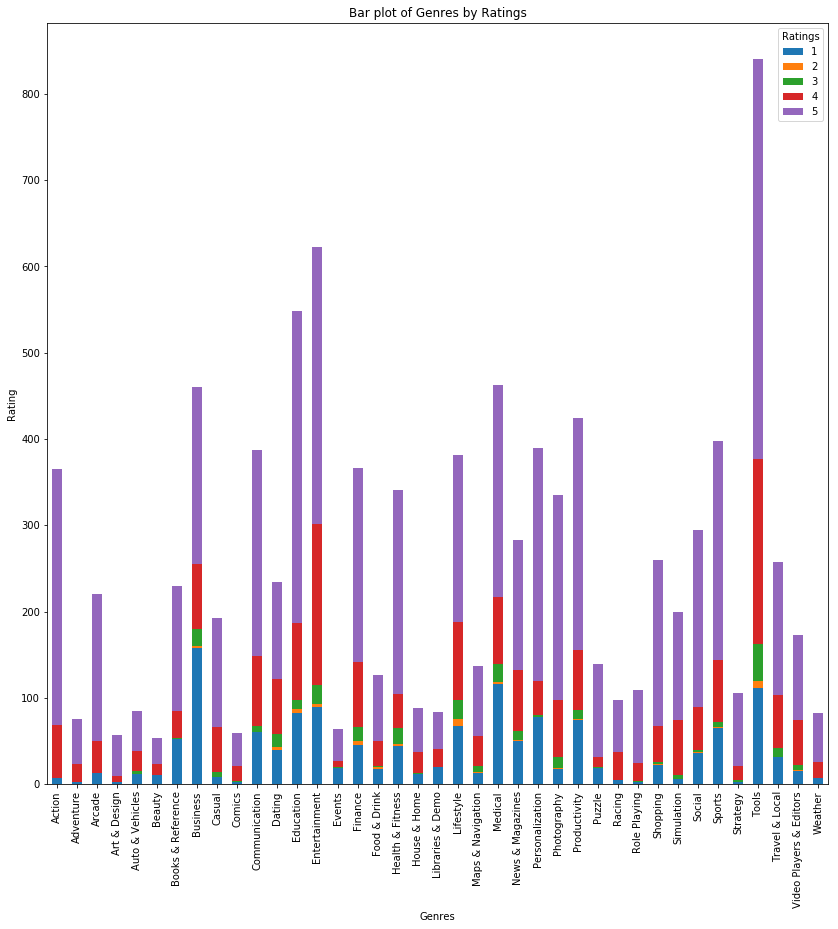

In [22]:
## Bar plot of Genres by Ratings

high_count_genre.loc[:, 'Rating_bin'] = pd.cut(high_count_genre.loc[:, 'Rating'], bins = 5, labels = range(5))
ax = high_count_genre.groupby(['Genres', 'Rating_bin']).size().unstack().plot(kind='bar', legend = False, stacked=True, figsize = (14,14))
plt.legend(title='Ratings', labels=['1', '2', '3', '4', '5'])
ax.set_xlabel("Genres")
ax.set_ylabel("Rating")
ax.set_title("Bar plot of Genres by Ratings")

The bar plot just confirms what the statistics showed, that most of the genres have high ratings (Ratings > 3). The genres with most apps having high ratings are Tools, Dating and Education. Genres like Adventure, Art & Design, House & Home, Weather have little to no apps with low ratings (< 3).

Text(0.5, 1.0, 'Bar plot of Ratings by Type')

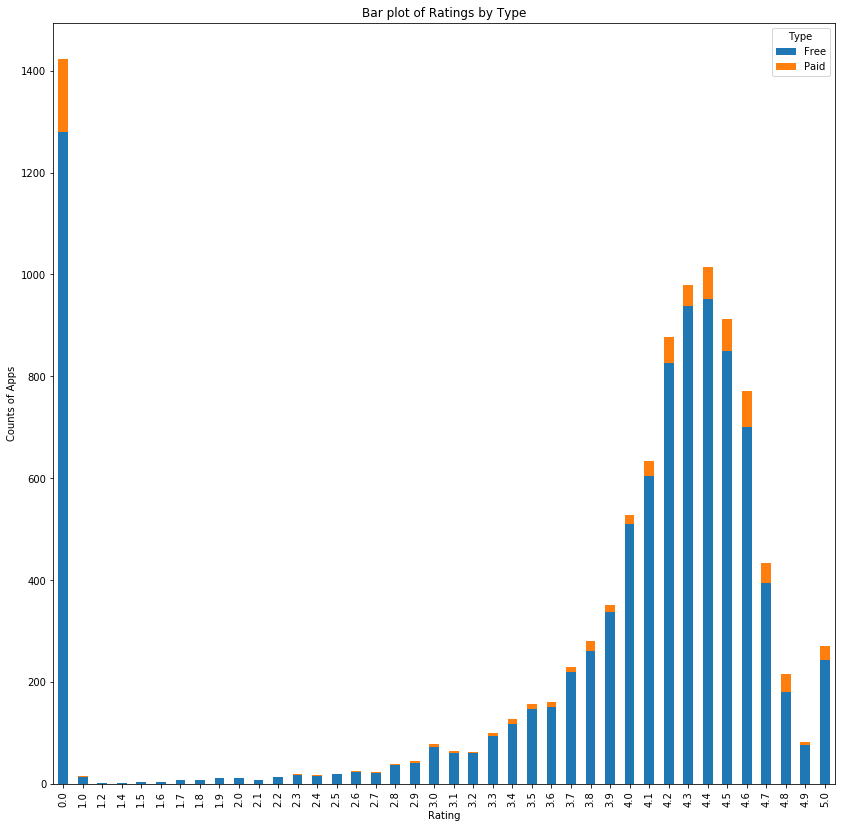

In [23]:
## Bar plot of Ratings by Type
ax = high_count_genre.groupby(['Rating', 'Type']).size().unstack().plot(kind='bar', stacked=True, figsize = (14,14))
ax.set_xlabel("Rating")
ax.set_ylabel("Counts of Apps")
ax.set_title("Bar plot of Ratings by Type")

Of course, there are a lot more free apps in the data set than there are paid ones, which is why there are a lot more free apps with high ratings. But, it is interesting to note that as the ratings go on increasing, so do the number of paid apps.

Text(0.5, 1.0, 'Bar plot of Ratings by Content Rating')

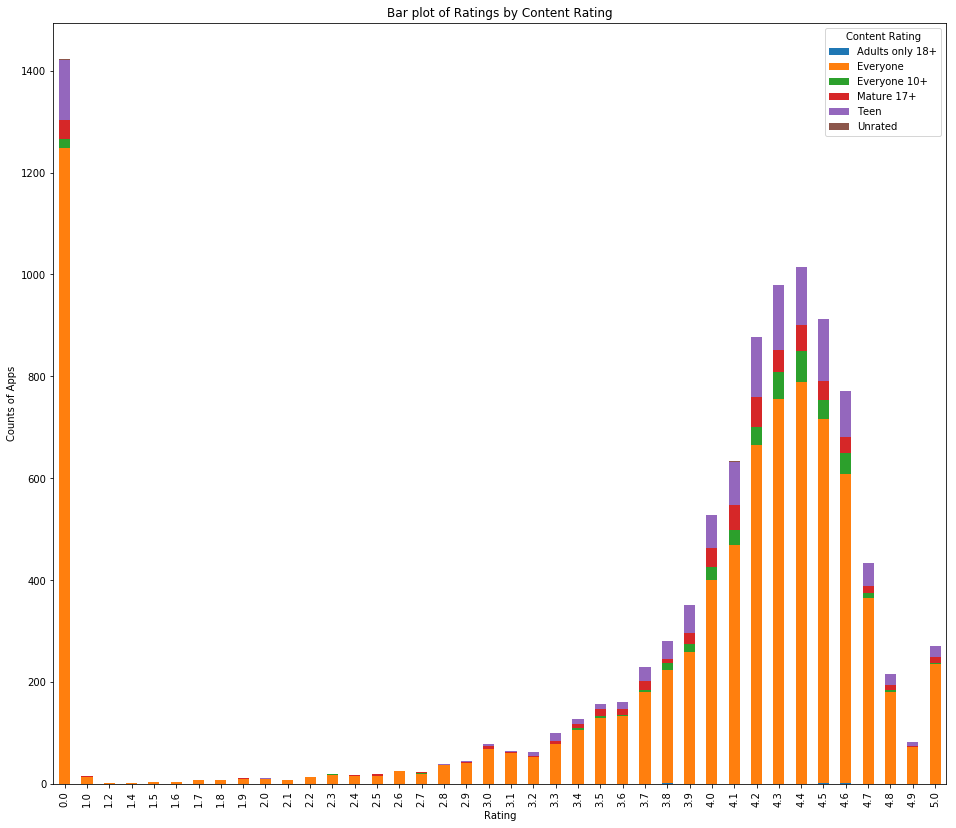

In [24]:
# Bar plot of Ratings by Content Ratings

ax = high_count_genre.groupby(['Rating', 'Content Rating']).size().unstack().plot(kind='bar', stacked=True, figsize = (16,14))
ax.set_xlabel("Rating")
ax.set_ylabel("Counts of Apps")
ax.set_title("Bar plot of Ratings by Content Rating")

As expected by now, an app for everyone may get a high or a low rating, but if an app is for teens, it has a very good chance of getting high ratings.

### Correlation between Rating, Reviews and Installs

Text(232.77500000000003, 0.5, 'Reviews')

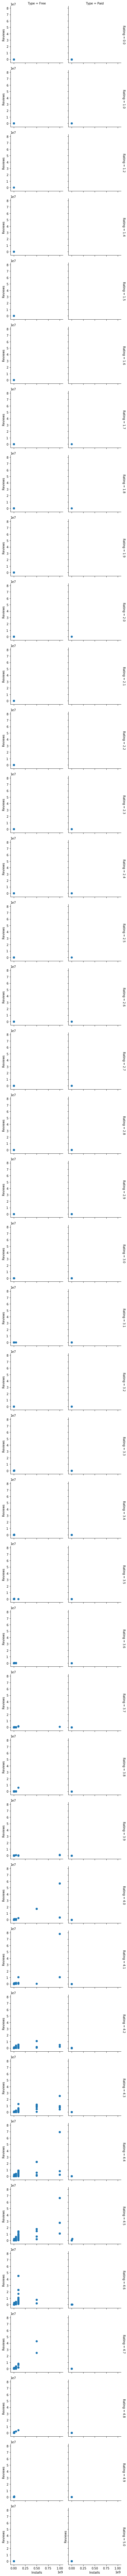

In [25]:
# Scatter plot of Installs v/s Reviews with 'Ratings' in the rows and 'Type' in the columns
g = sns.FacetGrid(app_df, 
                  row='Rating', 
                  col='Type',
                  palette="Set1",
                  margin_titles=True)
g = g.map(plt.scatter, "Installs", "Reviews") 
plt.xlabel("Installs")
plt.ylabel("Reviews")

The scatter plot shows some interesting results:
1. As we saw earlier, most of the apps are free.
2. Most apps have very few reviews and installs. But, the apps which have a large number of reviews and installs are all high rating apps and most of them are free.
3. Surprisingly, all the paid apps have very few reviews. All the high number of reviews are written only for the free apps.

Last but not the least, we will look at a feature in our data set which we haven't explored yet, "Size". We will also check out the distribution of genres by content ratings to know which genres have which app content.

Text(0.5, 1.0, 'Bar plot of Genres by Content Rating')

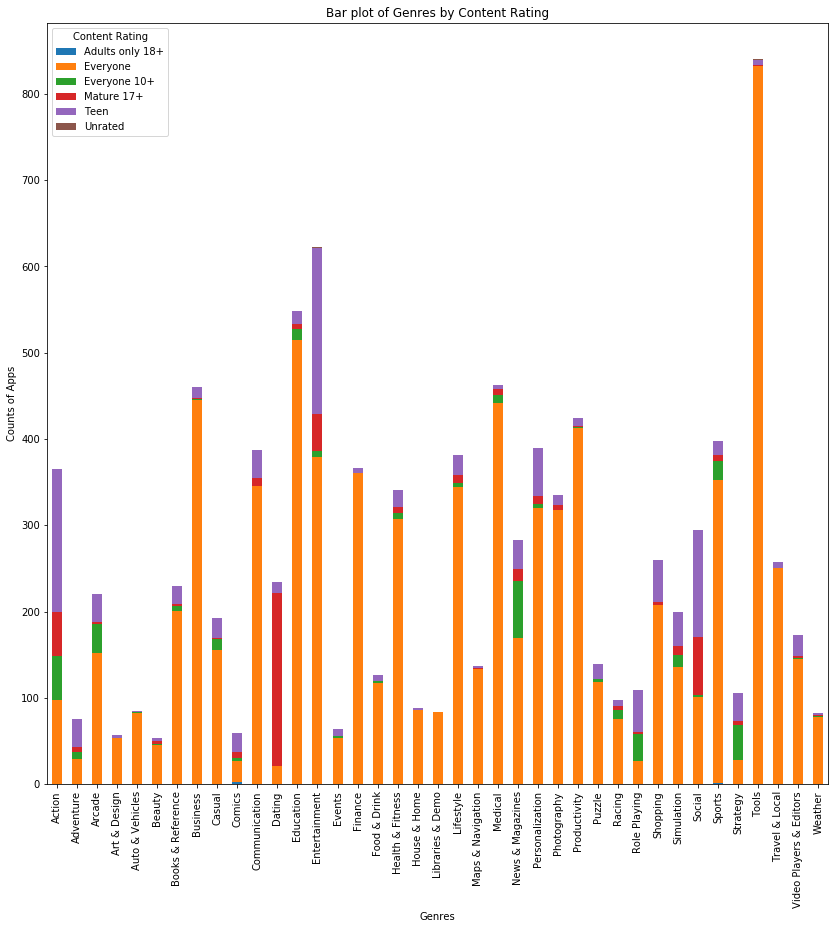

In [26]:
## Bar plot of Genres by Content Rating
ax = high_count_genre.groupby(['Genres', 'Content Rating']).size().unstack().plot(kind='bar', stacked=True, figsize = (14,14))
ax.set_xlabel("Genres")
ax.set_ylabel("Counts of Apps")
ax.set_title("Bar plot of Genres by Content Rating")

The above plot shows the distribution of genres across different Content Ratings:
1. Teen apps can be found a lot in genres like Action, Entertainment, Personalization, Social etc.
2. There are a significant amount of Adult apps in the Dating genre.

/home/keyuri/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/keyuri/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/home/keyuri/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


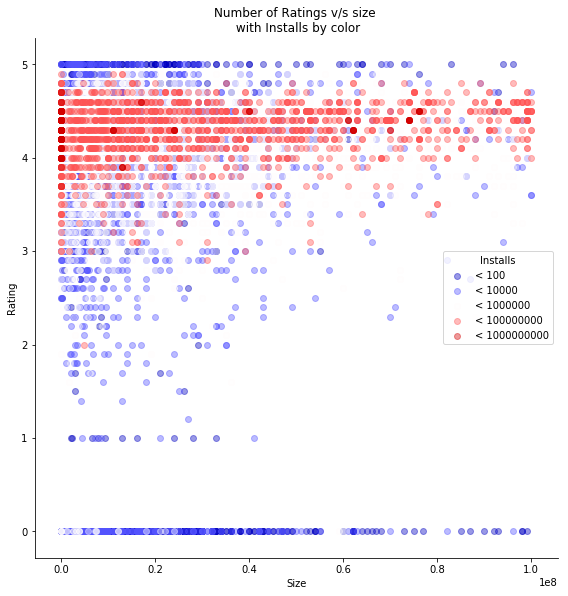

In [27]:
# Scatter plot of Ratings v/s size by Installs
bins = [0, 100, 10000, 1000000, 100000000, 1000000000]
labels = ['< 100', '< 10000', '< 1000000', '< 100000000', '< 1000000000']
high_count_genre.loc[:, 'Install_bin'] = pd.cut(high_count_genre.loc[:, 'Installs'], bins = bins, labels = labels)
sns.lmplot(x = 'Size', y = 'Rating',
           data = high_count_genre, 
           hue = "Install_bin", 
           legend=False,
           palette="seismic", 
           scatter_kws={'alpha':0.4},
           fit_reg = False,
          size=8, aspect=1)
plt.title('Number of Ratings v/s size \n with Installs by color')
plt.legend(title='Installs', labels = labels)

The scatter plot for Ratings v/s Size by Installs can be interpreted as follows:
1. The heavy apps i.e. apps with greater sizes, have higher ratings. There are only a few heavy apps having a rating less than 3.
2. High rating apps can be found in all size ranges.
3. Most apps are light, with less than 40 MB size.
4. Most apps have very low number of installs. But, there is an increasing trend with the increasing ratings, which is expected.
5. As expected, very high number of installs can be found for high rating apps which are also light (smaller size).
6. On the contrary, there are very low number of installs for low rating apps even if they are very light.

# Conclusion

After analyzing the google playstore app dataset, following conclusions can be made:
1. The genres with most apps that have high ratings are Tools, Dating and Education.
2. Most genres have apps that are light, free, for everyone and have high ratings with low number of reviews and installs.
3. High rating apps are the only apps which are heavy and have high number of reviews and installs.
4. Being free, heavy, having high number of installs and reviews increases the chances of getting high ratings for apps.
5. Genre with most number of paid apps is 'Medical' and one with most number of free apps is 'Tools'. Interestingly, 'Tools' has the highest number of high rating apps.
6. Teen apps have high chances of getting high reviews, installs and ratings.